<a href="https://colab.research.google.com/github/nifemi-alonge/ABM/blob/main/ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SET UP

In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

### Assumptions

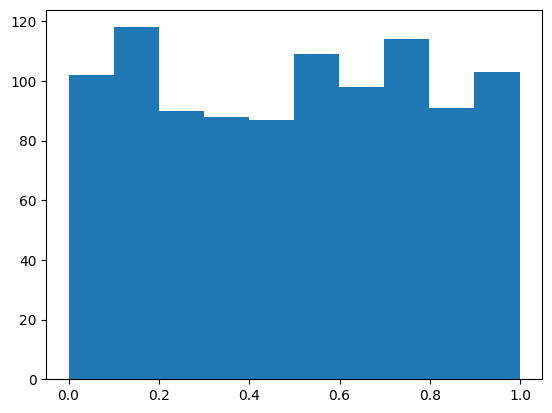

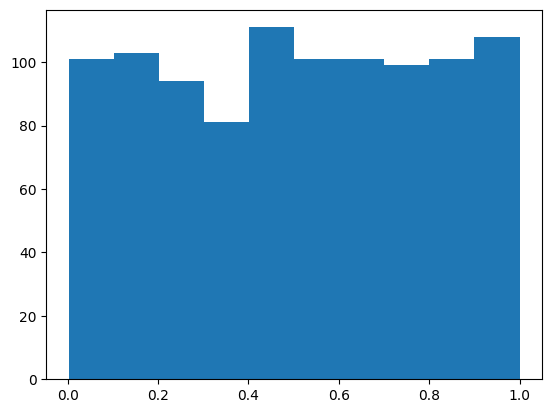

In [2]:
# set seed
random.seed(1)

# setting out agents:
# group A = on-peak, group B = off-peak
# like vowels in tutorial
groups_a = ['A'] * 980
groups_b = ['B'] * 20

# groups_a = ['A'] * 500
# groups_b = ['B'] * 500
groups = groups_a + groups_b

# setting up willingness parameter
# distribution from which to sample
# uniform distribution between 0 and 1
willingness_distribution = np.random.uniform(0,1.0, 1000)

# setting up persuasion parameter
persuasion_distribution = np.random.uniform(0,1.0, 1000)

# plot distribution
plt.hist(willingness_distribution)
plt.show()

plt.hist(persuasion_distribution)
plt.show()

### Functions

In [3]:
# create function to make agents
def make_agent(groups, willingness_to_switch, persuasiveness):
    return [groups, willingness_to_switch, persuasiveness]

# assign willingness to switch and persuasiveness (attributes of agents) to agents
def create_population(n):
    population = []
    for i in range(n):
        # pick a random agent from the list
        g = random.choice(groups)
        # willingness_to_switch is a random choice from willingness_distribution
        # like 'personalities' in tutorial
        willingness_to_switch = random.choice(willingness_distribution)
        # persuasiveness is a random choice from persuasion_distribution
        persuasiveness = random.choice(persuasion_distribution)

        agent = make_agent(g, willingness_to_switch, persuasiveness)
        population.append(agent)
    return population

# run function
population = create_population(1000)
print(population)

# calculate proportion of agents in groups A and B
def count(population):
    t=0.
    for agent in population:
        if agent[0] == 'A':
            t+= 1
    return t / len(population)

# run function, check proportions
prop_A = count(create_population(1000))
print('prop in A = ', prop_A)
print('prop in B = ', 1 - prop_A)

[['A', 0.7718390004730029, 0.24800361034111007], ['A', 0.9619144677389246, 0.3691440492434156], ['A', 0.7725415893404262, 0.49098926365705986], ['A', 0.5691102789698055, 0.9923147020057076], ['A', 0.7644700828677533, 0.07464925585853843], ['A', 0.41959069247481073, 0.03494619779580577], ['A', 0.7366456271848811, 0.6279328002167224], ['A', 0.5257996960485632, 0.4752074363753602], ['A', 0.03600187758995488, 0.9537503992207061], ['A', 0.01928307876734192, 0.7599345025820531], ['A', 0.38726389198154776, 0.060358415762495676], ['A', 0.7711147929809156, 0.3933945436711145], ['A', 0.6187366139488967, 0.4234242439692203], ['A', 0.5319983207428465, 0.7120074507829033], ['A', 0.05272665320437664, 0.5251831200555116], ['A', 0.1693582877041927, 0.2816886259227587], ['A', 0.3898110067815578, 0.21957995561506116], ['A', 0.44996776025154384, 0.5160733408558795], ['A', 0.9619144677389246, 0.7988768468131136], ['A', 0.17689267057781233, 0.11564693571512519], ['A', 0.10309325848652495, 0.799395128233927

### Interaction Functions

In [4]:
# create function to select agent pairs
def choose_pair(population):
    i = np.random.randint(0, len(population) -1)
    j = np.random.randint(0, len(population) -1)

    while i == j:
        j = np.random.randint(0, len(population) - 1) #only select unique agents

    return population[i], population[j]

# testing
population = create_population(8)
influencee, influencer = choose_pair(population)

# printouts
print('population = ', population)
print('chosen pair = ', influencee, influencer)
print('the person being influenced (influencee) is', influencee)
print('the person influencing (influencer) is', influencer)

# interact
# if influencee and influencer are in the same group - no change
# if influencee and influencer are in different groups:
# influencee will change groups is influencee[1], willingness * influencer[2], persuasiveness > threshold
# [0] = group, [1] = willingness_to_switch, [2] = persuasiveness
def interact(influencee,influencer, threshold):
    if influencee[0] == influencer[0]: # same - no change
        return influencee
    elif influencee[1] * influencer[2] >= threshold: # change is product
        influencee[0]=deepcopy(influencer[0])
        return influencee
    else:
        return influencee # anything else


# 3 conditions of interaction and switching

# testing the above interaction function
randominfluencee, randominfluencer = choose_pair(create_population(8))
print('influencee = ', randominfluencee)
print('influencer = ', randominfluencer)

# 0.7 is threshold here
updated_influencee = interact(randominfluencee, randominfluencer, 0.7)
print('after interaction the influencee is', updated_influencee[0])

# testing function works as expected 0 correct
t_influencee =  ['A', 0.9167229343173493, 0.6485551485138286]
t_influencer =  ['B', 0.4167229343173493, 1.0000000000000000]
# 0.7 is threshold here
updated_influencee = interact(t_influencee, t_influencer, 0.7)
print('after interaction the influencee is', updated_influencee[0])

population =  [['A', 0.2755688325769582, 0.9282580812653622], ['A', 0.46614471422189474, 0.3885730279495596], ['A', 0.5964910073887356, 0.7684060691684352], ['B', 0.7707140329255763, 0.6852244222512177], ['A', 0.1804208345858056, 0.7748143725919494], ['A', 0.39554667809573074, 0.5440316167755618], ['A', 0.73303621126174, 0.6587821562790775], ['A', 0.6840252013551824, 0.4071681833282079]]
chosen pair =  ['A', 0.73303621126174, 0.6587821562790775] ['B', 0.7707140329255763, 0.6852244222512177]
the person being influenced (influencee) is ['A', 0.73303621126174, 0.6587821562790775]
the person influencing (influencer) is ['B', 0.7707140329255763, 0.6852244222512177]
influencee =  ['A', 0.45118169738456326, 0.8201945303970885]
influencer =  ['A', 0.3188219699994297, 0.14873415327755624]
after interaction the influencee is A
after interaction the influencee is B


### Simulation

initial pop =  [['A', 0.6755865732012888, 0.46807399151095863], ['A', 0.5173519768875733, 0.6280093978887539], ['A', 0.9223984919573175, 0.015531665385102977], ['A', 0.7889648488174376, 0.9871933538805074], ['A', 0.38593267327768677, 0.29265686670202107], ['A', 0.797723338576231, 0.12907432350094816], ['A', 0.9603287600452637, 0.3820581004062754], ['A', 0.5783072619077865, 0.7575584572347306], ['A', 0.9244204997893163, 0.08616399448787149], ['A', 0.934952716667324, 0.9816349370281975], ['A', 0.30600334178978883, 0.11383601936570875], ['A', 0.20822767629753025, 0.155566767538049], ['A', 0.2959261025715403, 0.877229372948077], ['A', 0.7073272739163318, 0.5865591185051171], ['A', 0.3050475461023495, 0.8613865412958038], ['A', 0.1612434415088747, 0.9262556736599569], ['A', 0.7707653856177923, 0.35837047186216164], ['A', 0.010872963811477843, 0.5232541613164127], ['A', 0.5319983207428465, 0.6668409624586634], ['A', 0.5933248427714284, 0.24555013075298115], ['A', 0.009361921319940625, 0.0602

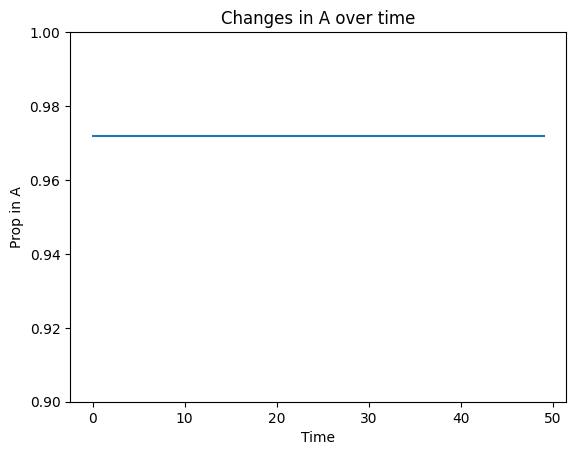

initial pop =  [['A', 0.2223043915029982, 0.6676766216489073], ['A', 0.35324917401759603, 0.20013669745914353], ['A', 0.435574743818665, 0.5251831200555116], ['A', 0.768675372468665, 0.9225982456053574], ['A', 0.7925459271575038, 0.13379531119181953], ['A', 0.8644310442892652, 0.7650658690792521], ['A', 0.07953883894884572, 0.20518629106227593], ['A', 0.8261055895296449, 0.8653225683110932], ['A', 0.27193185394057195, 0.007208394346388425], ['A', 0.5795496089818359, 0.7758671175363284], ['A', 0.5891014216759055, 0.8123940409978582], ['A', 0.9594193465146655, 0.5287729990728081], ['A', 0.5014480461881872, 0.5865591185051171], ['A', 0.8225859145558013, 0.45594550569984893], ['A', 0.7007036355145716, 0.2546090865178553], ['A', 0.9589218730565723, 0.05050958120409377], ['A', 0.10447703476024106, 0.45995867438105253], ['A', 0.13413974570891485, 0.9674483081305196], ['A', 0.06129587273828918, 0.8852225468496165], ['A', 0.8129112236824743, 0.4209479492457281], ['A', 0.2817733914952223, 0.3257

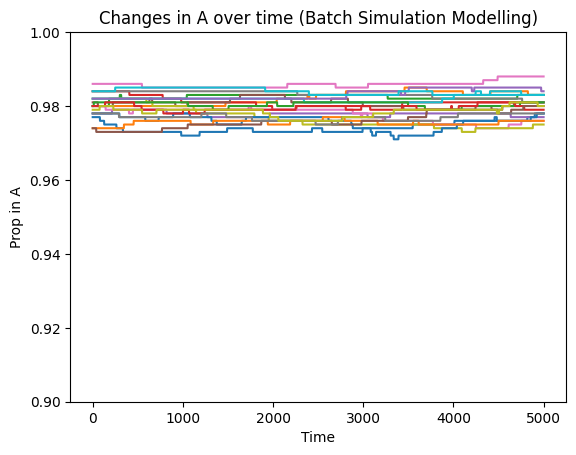

initial pop =  [['A', 0.3118793728242596, 0.4668308174621212], ['A', 0.1691881101028937, 0.19809675810132954], ['A', 0.1320440953239691, 0.23509883980190383], ['A', 0.7259887693777821, 0.8929132006932924], ['A', 0.16907842221219715, 0.5232541613164127], ['A', 0.08396116507448947, 0.6218350845021791], ['A', 0.1488649274908207, 0.9484048881103113], ['A', 0.05542585877380157, 0.43334439549143755], ['A', 0.32728462300611194, 0.06926124358317598], ['A', 0.2325092489298196, 0.5859276834001512], ['A', 0.12894719671697974, 0.9042297218533463], ['A', 0.8951177232877737, 0.15062456992573814], ['A', 0.95440001972731, 0.06986989403206634], ['A', 0.7311366019316446, 0.8479583879608016], ['A', 0.5974211958260531, 0.5404296626301965], ['A', 0.594050867344804, 0.021874399574287717], ['A', 0.921948271741855, 0.07296781929023255], ['A', 0.4333598577459431, 0.7615762296000219], ['A', 0.5891014216759055, 0.6279328002167224], ['A', 0.7993959421823514, 0.6749027809856768], ['A', 0.00024017925459163258, 0.43

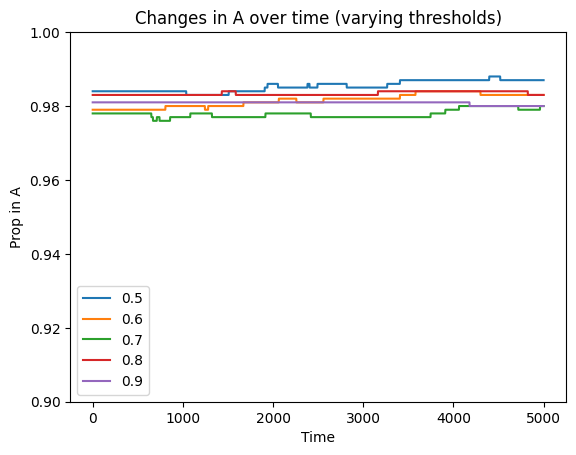

In [5]:
# n no. of agents
# k no. of interactions
# threshold input to interact function
def simulate(n,k,threshold):
    population = create_population(n)
    print('initial pop = ', population)

    proportion = []

    for i in range(k):
        pair = choose_pair(population)
        interact(pair[0],pair[1], threshold)
        proportion.append(count(population))
    return population, proportion

# running simulation function
new_population, proportion = simulate(1000, 50, 0.7)
print('final pop = ', new_population)

# plot
plt.plot(proportion)
plt.title('Changes in A over time')
plt.ylabel('Prop in A')
plt.xlabel('Time')
plt.ylim(0.9,1) # can change these to zoom in
plt.show()

# batch simulate
# n no. of agents
# k no. of interactions
# so no. of simulations - how many times
# threshold input to interact function
def batch_simulate(n, k, s, threshold):
    batch_proportions = []
    for i in range(s):
        new_population, proportion = simulate(n, k, threshold)
        batch_proportions.append(proportion)
    return batch_proportions

# show batch simulate
results = batch_simulate(1000, 5000, 20, 0.7)

plt.ylim(0.9,1) # can change these to zoom in

# plotting
for i in results:
    plt.plot(i)

plt.title('Changes in A over time (Batch Simulation Modelling)')
plt.ylabel('Prop in A')
plt.xlabel('Time')
plt.show()

# Threshold modelling
def batch_threshold(n, k, threshold):
    batch_proportions = []
    for i in threshold:
        new_population, proportion = simulate(n, k, i)
        batch_proportions.append(proportion)
    return batch_proportions

# show batch simulate
list_of_thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
results = batch_threshold(1000, 5000, list_of_thresholds)

plt.ylim(0.9,1) # can change these to zoom in

# plotting
for i in range(len(results)):
    plt.plot(results[i], label=list_of_thresholds[i])

plt.title('Changes in A over time (varying thresholds)')
plt.ylabel('Prop in A')
plt.xlabel('Time')
plt.legend()
plt.show()

Source: Bill Thompson and Limor Raviv, 2018 Tutorial Agent Based Models, Github
